In [54]:
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [29]:
df = pd.read_csv('./breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
174,871642,B,10.66,15.15,67.49,349.6,0.08792,0.04302,0.00000,0.00000,...,11.54,19.20,73.20,408.3,0.10760,0.06791,0.00000,0.00000,0.2710,0.06164
83,8611792,M,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,...,20.33,32.72,141.30,1298.0,0.13920,0.28170,0.24320,0.18410,0.2311,0.09203
164,8712289,M,23.27,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.09702,...,28.01,28.22,184.20,2403.0,0.12280,0.35830,0.39480,0.23460,0.3589,0.09187
507,91544002,B,11.06,17.12,71.25,366.5,0.11940,0.10710,0.04063,0.04268,...,11.69,20.74,76.08,411.1,0.16620,0.20310,0.12560,0.09514,0.2780,0.11680
370,9012315,M,16.35,23.29,109.00,840.4,0.09742,0.14970,0.18110,0.08773,...,19.38,31.03,129.30,1165.0,0.14150,0.46650,0.70870,0.22480,0.4824,0.09614
119,865128,M,17.95,20.01,114.20,982.0,0.08402,0.06722,0.07293,0.05596,...,20.58,27.83,129.20,1261.0,0.10720,0.12020,0.22490,0.11850,0.4882,0.06111
190,874858,M,14.22,23.12,94.37,609.9,0.10750,0.24130,0.19810,0.06618,...,15.74,37.18,106.40,762.4,0.15330,0.93270,0.84880,0.17720,0.5166,0.14460
407,905190,B,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,...,14.40,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488,0.08151
169,8712853,B,14.97,16.95,96.22,685.9,0.09855,0.07885,0.02602,0.03781,...,16.11,23.00,104.60,793.7,0.12160,0.16370,0.06648,0.08485,0.2404,0.06428
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.69,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637


In [31]:
df.drop(['id'],axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [33]:
df['diagnosis_0_1'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
df[['diagnosis', 'diagnosis_0_1']].head()


,diagnosis,diagnosis_0_1
0,M,1
1,M,1
2,M,1
3,M,1
4,M,1


In [34]:
X = df.drop(['diagnosis', 'diagnosis_0_1'], axis=1).copy()
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
y = df['diagnosis_0_1'].copy()
y.head()


0    1
1    1
2    1
3    1
4    1
Name: diagnosis_0_1, dtype: int64

In [36]:
sum(y)/len(y)

0.37258347978910367

In [37]:
X.dtypes
X_encoded = pd.get_dummies(X, columns=['gender',
                                      'Partner',
                                      'Dependents',
                                      'PhoneService',
                                      'MultipleLines',
                                      'InternetService',
                                      'OnlineSecurity',
                                      'OnlineBackup',
                                      'DeviceProtection',
                                      'TechSupport',
                                      'StreamingTV',
                                      'StreamingMovies',
                                      'Contract',
                                      'PaperlessBilling',
                                      'PaymentMethod',
                                      'TotalCharges'])
X_encoded.head()

KeyError: "None of [Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',\n       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',\n       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',\n       'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],\n      dtype='object')] are in the [columns]"

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,            # 테스트 데이터 비율 (기본값은 명시하는 것이 좋음)
    random_state=42,           # 재현 가능성
    stratify=y                 # 클래스 비율 유지
)

[0]	validation_0-aucpr:0.95015
[1]	validation_0-aucpr:0.97523
[2]	validation_0-aucpr:0.98442
[3]	validation_0-aucpr:0.98888
[4]	validation_0-aucpr:0.98757
[5]	validation_0-aucpr:0.98797
[6]	validation_0-aucpr:0.98914
[7]	validation_0-aucpr:0.98954
[8]	validation_0-aucpr:0.99218
[9]	validation_0-aucpr:0.99306


/Users/imhyeonsig/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:14:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

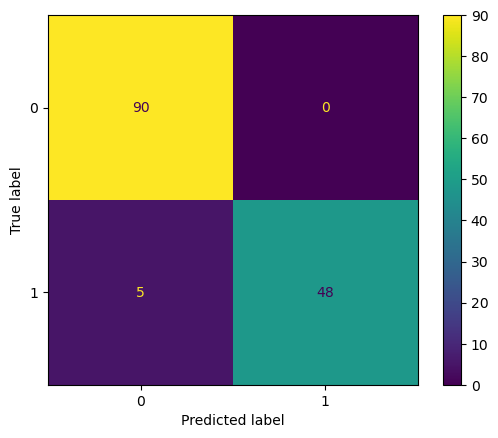

In [70]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=clf_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_rf.classes_)
disp.plot()


clf_xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=10,
    seed=42,
    eval_metric='aucpr',
    use_label_encoder=False
)
clf_xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)


In [63]:
y_test.head()

12     1
506    0
321    1
71     0
375    0
Name: diagnosis_0_1, dtype: int64

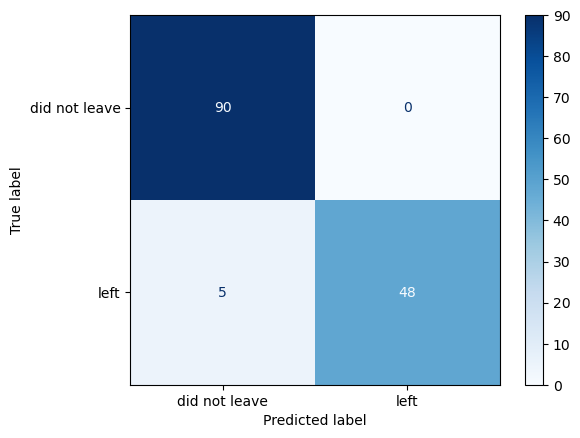

In [65]:
ConfusionMatrixDisplay.from_estimator(
    clf_xgb,
    X_test,
    y_test,
    display_labels=["did not leave", "left"],
    cmap='Blues',
    values_format='d'
)

In [66]:
y_pred = clf_xgb.predict(X_test)

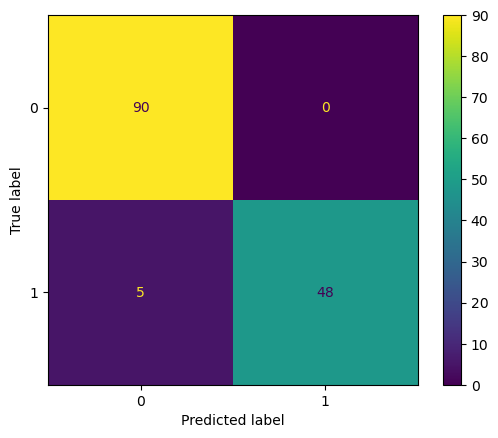

In [67]:
y_pred = clf_xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=clf_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf_xgb.classes_)
disp.plot()



In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 기존 X, y, X_train, X_test, y_train, y_test가 준비되어 있다고 가정

# 1. 모델 정의
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. 학습
rf_model.fit(X_train, y_train)

# 3. 예측
rf_preds = rf_model.predict(X_test)

# 4. 평가
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))

Accuracy: 0.965034965034965
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        90
           1       1.00      0.91      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143

